In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
titles = pd.read_csv("titles.csv")
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [2]:
import matplotlib.pyplot as plt
cast = pd.read_csv("cast.csv")
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# 1. Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [3]:
superman_batman_roles = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]

# Group the DataFrame by year and count the number of "Superman" and "Batman" characters for each year
yearly_character_counts = superman_batman_roles.groupby(['year', 'character']).size().unstack(fill_value=0)

# Determine which years are "Superman years" (more Superman characters than Batman)
superman_years = yearly_character_counts[yearly_character_counts['Superman'] > yearly_character_counts['Batman']]

# Count the number of "Superman years"
num_superman_years = len(superman_years)

# Display the result
print("Number of Superman years:", num_superman_years)

Number of Superman years: 11


# 2. How many years have been "Batman years", with more Batman characters than Superman characters?

In [4]:
superman_batman_roles = cast[(cast['character'] == 'Superman') | (cast['character'] == 'Batman')]

# Group the DataFrame by year and count the number of "Superman" and "Batman" characters for each year
yearly_character_counts = superman_batman_roles.groupby(['year', 'character']).size().unstack(fill_value=0)

# Determine which years are "Batman years" (more Batman characters than Superman)
batman_years = yearly_character_counts[yearly_character_counts['Batman'] > yearly_character_counts['Superman']]

# Count the number of "Batman years"
num_batman_years = len(batman_years)

# Display the result
print("Number of Batman years:", num_batman_years)

Number of Batman years: 27


# 3. Plot the number of actor roles each year and the number of actress roles each year over the history of film.

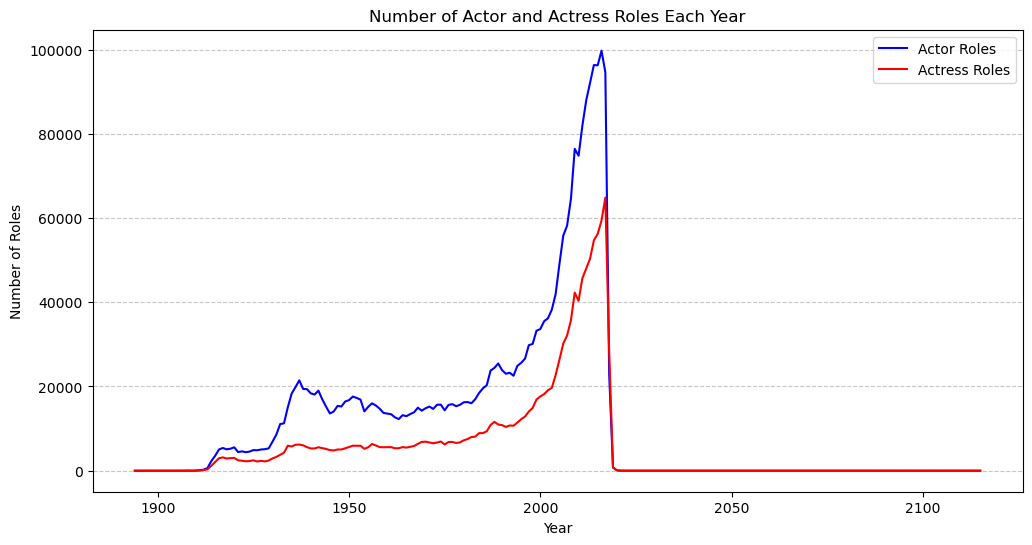

In [5]:
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]

# Group the DataFrame by year and type (actor/actress) and count the number of roles
roles_per_year = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(roles_per_year.index, roles_per_year['actor'], label='Actor Roles', color='blue')
plt.plot(roles_per_year.index, roles_per_year['actress'], label='Actress Roles', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

<Figure size 1200x600 with 0 Axes>

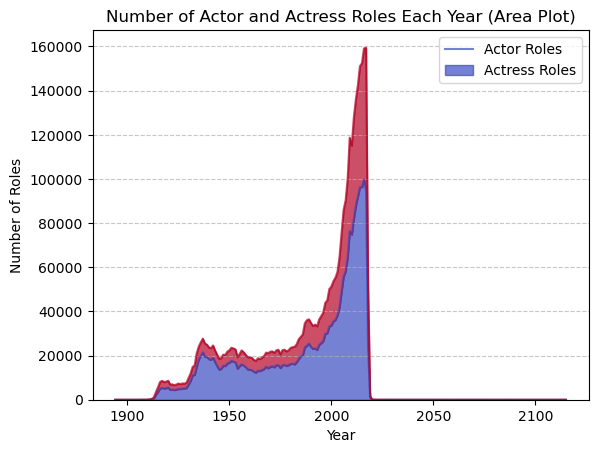

In [6]:
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]

# Group the DataFrame by year and type (actor/actress) and count the number of roles
roles_per_year = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

# Plotting as an area plot
plt.figure(figsize=(12, 6))
roles_per_year.plot(kind='area', stacked=True, colormap='coolwarm', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Actor and Actress Roles Each Year (Area Plot)')
plt.legend(['Actor Roles', 'Actress Roles'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

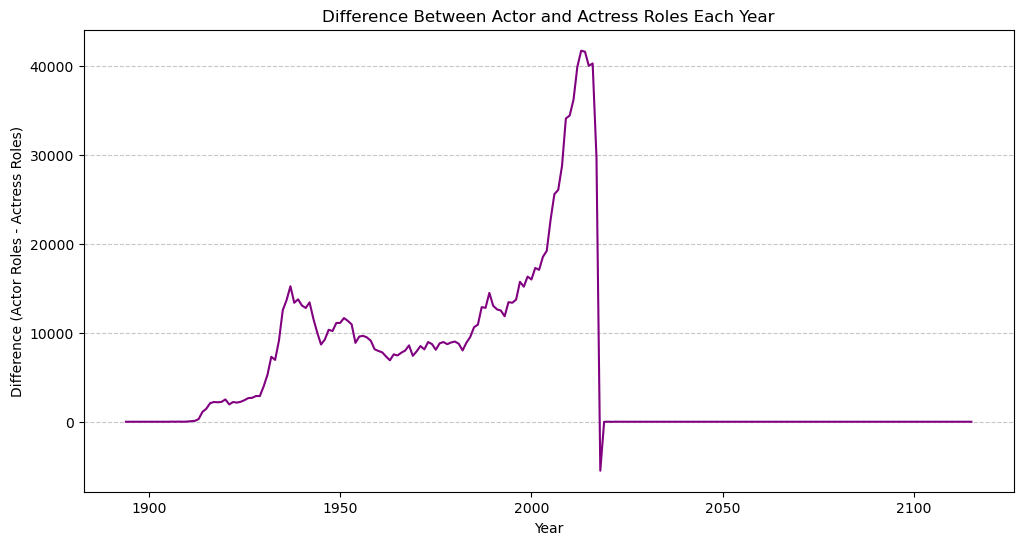

In [7]:
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]

# Group the DataFrame by year and type (actor/actress) and count the number of roles
roles_per_year = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

# Calculate the difference between actor and actress roles for each year
roles_difference = roles_per_year['actor'] - roles_per_year['actress']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(roles_difference.index, roles_difference, label='Difference', color='purple')
plt.xlabel('Year')
plt.ylabel('Difference (Actor Roles - Actress Roles)')
plt.title('Difference Between Actor and Actress Roles Each Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6. Plot the fraction of roles that have been 'actor' roles each year in the history of film.

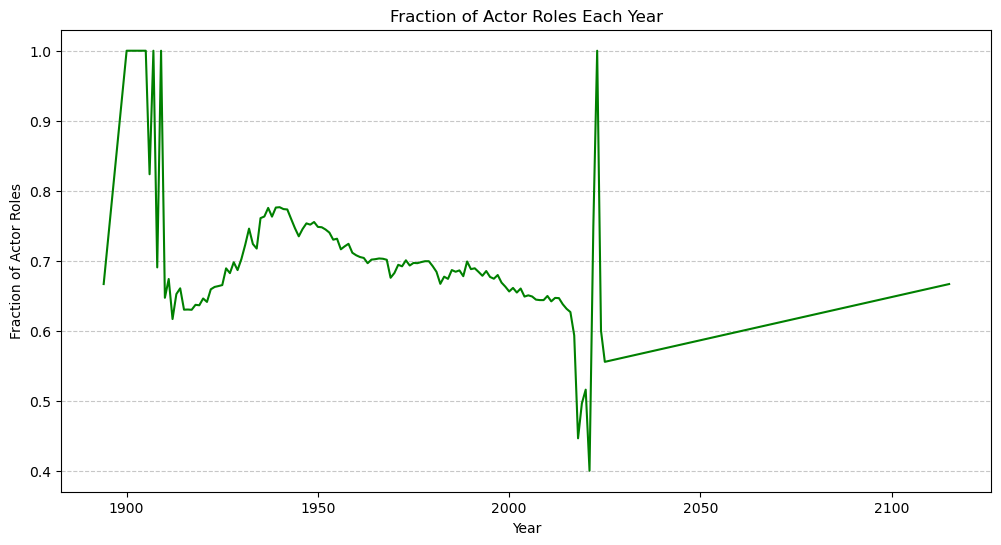

In [8]:
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]

# Group the DataFrame by year and type (actor/actress) and count the number of roles
roles_per_year = actor_actress_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

# Calculate the fraction of "actor" roles each year
total_roles_per_year = roles_per_year['actor'] + roles_per_year['actress']
actor_fraction_per_year = roles_per_year['actor'] / total_roles_per_year

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(actor_fraction_per_year.index, actor_fraction_per_year, label='Fraction of Actor Roles', color='green')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles Each Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

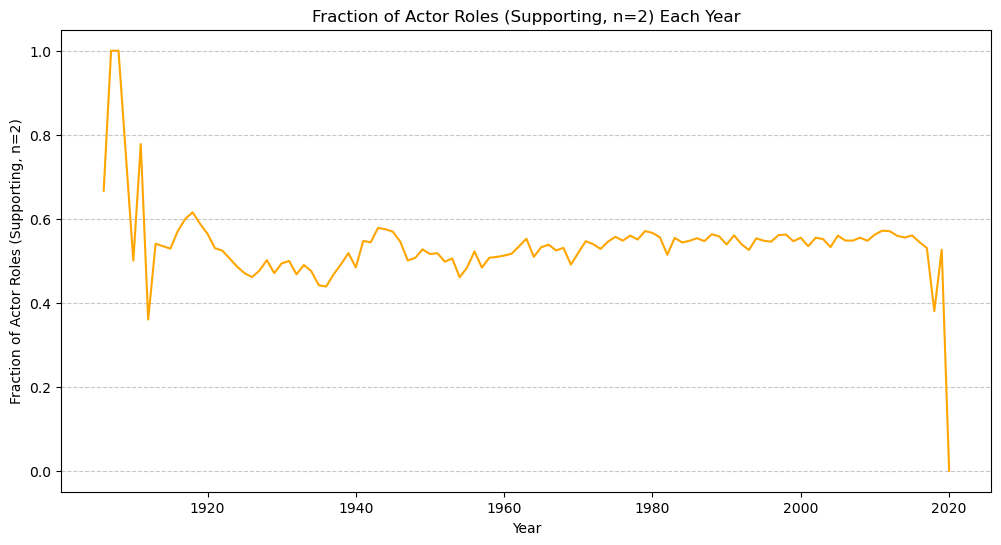

In [9]:
supporting_actor_roles = cast[(cast['type'] == 'actor') & (cast['n'] == 2) | (cast['type'] == 'actress') & (cast['n'] == 2)]

# Group the DataFrame by year and type (actor/actress) and count the number of roles
roles_per_year = supporting_actor_roles.groupby(['year', 'type']).size().unstack(fill_value=0)

# Calculate the fraction of "actor" roles among supporting roles (n=2) each year
total_roles_per_year = roles_per_year['actor'] + roles_per_year['actress']
actor_fraction_per_year = roles_per_year['actor'] / total_roles_per_year

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(actor_fraction_per_year.index, actor_fraction_per_year, label='Fraction of Actor Roles', color='orange')
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles (Supporting, n=2)')
plt.title('Fraction of Actor Roles (Supporting, n=2) Each Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 8. Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

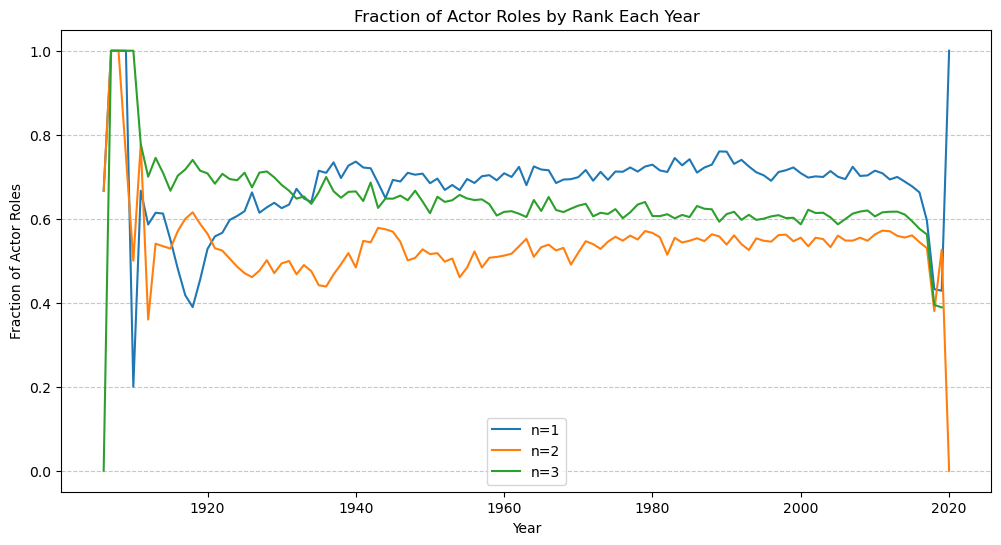

In [10]:
actor_actress_roles = cast[(cast['type'] == 'actor') | (cast['type'] == 'actress')]

ranks = [1, 2, 3]

plt.figure(figsize=(12, 6))

for rank in ranks:

    rank_roles = actor_actress_roles[actor_actress_roles['n'] == rank]

    roles_per_year = rank_roles.groupby(['year', 'type']).size().unstack(fill_value=0)
    

    total_roles_per_year = roles_per_year['actor'] + roles_per_year['actress']
    actor_fraction_per_year = roles_per_year['actor'] / total_roles_per_year
    
    # Plot the line for the current rank
    plt.plot(actor_fraction_per_year.index, actor_fraction_per_year, label=f'n={rank}')

# Add labels, title, legend, and grid
plt.xlabel('Year')
plt.ylabel('Fraction of Actor Roles')
plt.title('Fraction of Actor Roles by Rank Each Year')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()